# Lecture 4: Tracking
## Ionisation energy losses in matter

Author: Aleksander Filip Żarnecki (University of Warsaw)


In [1]:
import math
from ROOT import *
import numpy as np
from scipy.optimize import fsolve
from array import array

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### ROOT style configuration

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(800)
gStyle.SetCanvasDefH(700)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.2,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### Fundamental constants

In [3]:
# Fine coupling constant
aem = 1/137.035999139

# Unit conversion factor 
hc = 197.3269788  # MeV * fm 

# Speed of light
c = 1

# Culomb potential constant (in particle units)
k = aem * hc

# Avogadro constant 
NA = 6.022140857E+23

# Target (electron) mass [MeV]
me = 0.51099895   

### Medium properties 

In [4]:
# Medium properties (water)
I = 0.0000797      # Mean excitation energy [MeV]
Z2A = 0.55509      # mol/g
rho = 1.0          # g/cm^3

### Part I
### Energy transfer in single collision - Bohr approximation

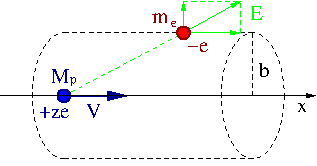

In [5]:
# Momentum transfer in quasi-statical approximation (Bohr)
Image(filename='bohr_calc_new.png')

In [6]:
# Non-relativistic low-transfer approximation (Bohr)
#
# Projectile with charge ze and velocity beta[c] 
# traveling at distance b[fm] from electron at rest

def dp_bohr(M,v,b,z=1):
    beta = v/c
    val = 2*z*aem/b/beta
    return val*hc

# Corresponding energy transfer to electron (classical)

def dE_bohr(M,v,b,z=1):
    pe = dp_bohr(M,v,b,z)
    return pe*pe/me/2.


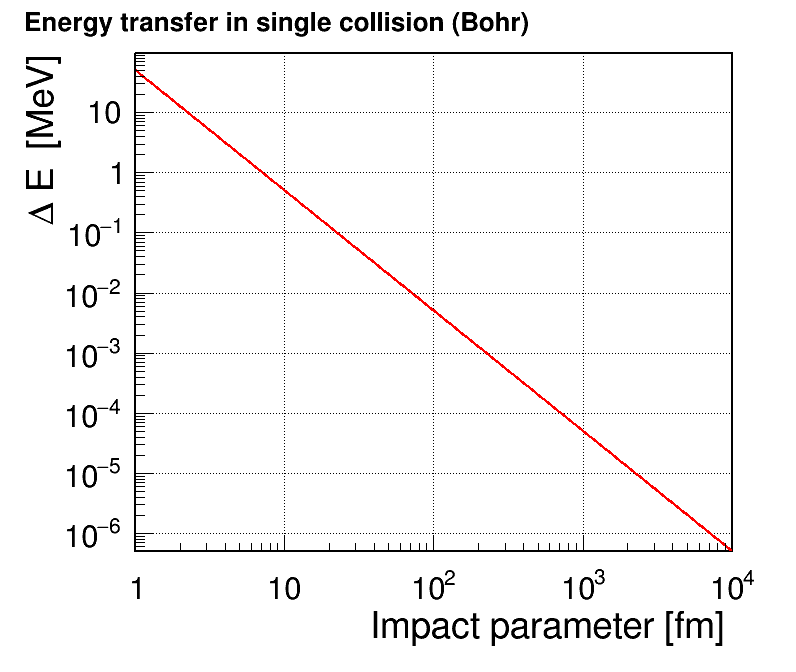

Info in <TCanvas::Print>: png file dE_bohr.png has been created


In [7]:
# Projectile mass [MeV]
Mp = 938.272081    # proton

# Projectile velocity
Vp = 0.4 * c

def fundE(x,par):
    return dE_bohr(par[0],par[1],x[0])

fdE=TF1("fdE",fundE,1.,10000.,2)
fdE.SetTitle("Energy transfer in single collision (Bohr)")
fdE.SetParameter(0,Mp)   
fdE.SetParameter(1,Vp) 
fdE.SetNpx(1000)
fdE.GetXaxis().SetTitle("Impact parameter [fm]")
fdE.GetYaxis().SetTitle("#Delta E  [MeV]")

cdE=TCanvas('cdE')
cdE.SetLogx(1)
cdE.SetLogy(1)

fdE.Draw()

fname = 'dE_bohr.png'
cdE.Update()
cdE.Print(fname)

Image(filename=fname)

### Part II
### Energy transfer in single collision - Rutherford

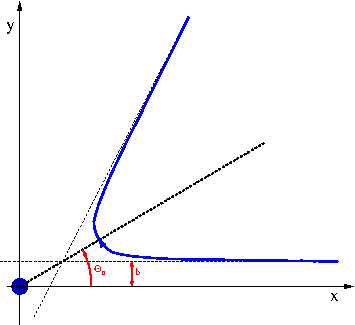

In [8]:
# Scattering in the Culomb field
Image(filename='hiperbola.png')

Solution for trajectory in the Culomb field:

$ r(\theta)  =  \frac{p}{\varepsilon \cdot \cos ( \theta - \theta_\circ)-1} $

where: $\varepsilon = \sqrt{1 + \frac{2EL^2}{mk^2}}$



In [9]:
# eccentricity parameter for electron hyperbolic orbit  (E>0)
# Calculated in the center of mass frame 

def myecc(m,v,b):   # in MeV/c^2,  c,  fm
    
    E = m*v*v/2.
    L = m*v*b
    
    ecc2 = 1. + 2*E*L*L/m/k/k
    
    return np.sqrt(ecc2) 


# Energy transfer to electron in the projectile frame

def dE_ruth(M,v,b):

# Correction taking into account finite projectile mass
    mcorr = M/(M+me)
    
# Reduced mass
    mu = me * mcorr

# Center of mass frame velocity
    vcms = v * mcorr
    
# Corrected impact parameter
    bcms = b * mcorr
    
    ecc = myecc(mu,vcms,bcms)
    
    dpe = 2*me*vcms/ecc
    
    dEe = dpe*dpe/2./me
    
    return dEe

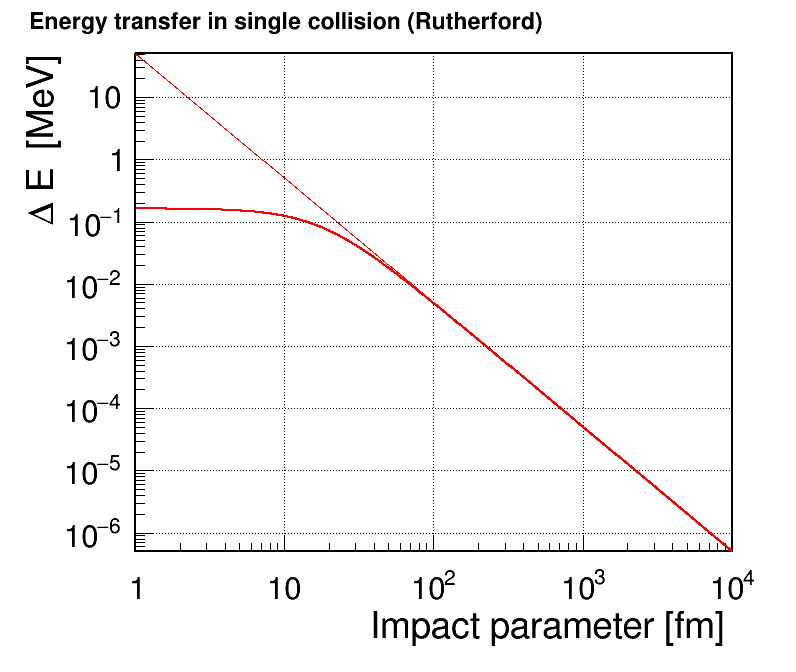

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdE
Info in <TCanvas::Print>: png file dE_ruth.png has been created


In [10]:
# Plot energy loss as a function of impact parameter

def fundE2(x,par):
    return dE_ruth(par[0],par[1],x[0])

fdE2=TF1("fdE2",fundE2,1.,10000.,2)
fdE2.SetTitle("Energy transfer in single collision (Rutherford)")
fdE2.SetParameter(0,Mp)   
fdE2.SetParameter(1,Vp) 
fdE2.SetNpx(1000)
fdE2.GetXaxis().SetTitle("Impact parameter [fm]")
fdE2.GetYaxis().SetTitle("#Delta E  [MeV]")

cdE=TCanvas('cdE')
cdE.SetLogx(1)
cdE.SetLogy(1)

fdE2.SetMaximum(fdE.GetMaximum())
fdE2.Draw()

fdE.SetLineWidth(1)
fdE.SetLineStyle(9)
fdE.Draw("same")

cdE.Update()

fname='dE_ruth.png'
cdE.Print(fname)

Image(filename=fname)

### Part III
### Maximum energy transfer

In [11]:
# Maximum energy transfer in non-relativistic colistion
# of projectile with momentum p and mass M, to target with mass m (at rest)
# Units:  c = 1

def Wmaxnr(p,M,m=me):

# Projectile velocity    
    v = p/M
    
# Correction taking into account finite projectile mass
    mcorr = M/(M+m)
    
# Reduced mass
    mu = m * mcorr

# Center of mass frame velocity
    vcms = v * mcorr

# Maximum momentum transfer

    dpt = 2*m*vcms
    
# Corresponding energy transfer (classical)

    dEt = dpt*dpt/2./m
    
    return dEt 

In [12]:
# Maximum energy transfer in relativistic colistion
# of projectile with momentum p and mass M, to target with mass m
# Units:  c = 1

def Wmax(p,M,m=me):
    betagamma = p/M
    gamma = sqrt(1+betagamma*betagamma)
    
    val = 2*m*betagamma*betagamma
    corr = 1 + 2*gamma*(m/M) + (m/M)*(m/M)
    
    return val/corr

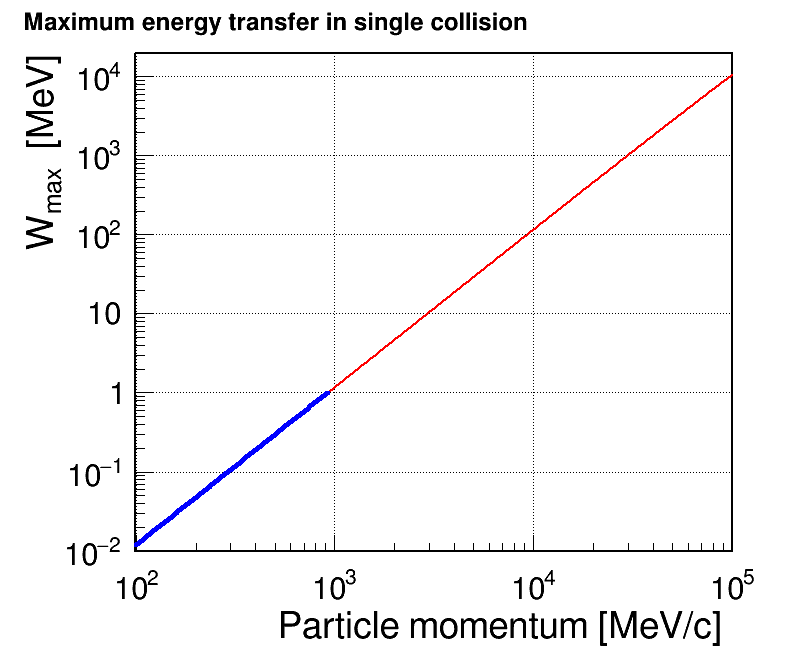

Info in <TCanvas::Print>: png file Wmax.png has been created


In [13]:
# Define root function to plot the momentum transfer

def funWmaxnr(x,par):
    return Wmaxnr(x[0],par[0],par[1])

def funWmax(x,par):
    return Wmax(x[0],par[0],par[1])

fWmax=TF1("fWmax",funWmax,99.,100000.,2)
fWmax.SetTitle("Maximum energy transfer in single collision")
fWmax.SetParameter(0,Mp)   
fWmax.SetParameter(1,me) 
fWmax.SetNpx(1000)
fWmax.SetMinimum(1E-2)
fWmax.GetXaxis().SetTitle("Particle momentum [MeV/c]")
fWmax.GetYaxis().SetTitle("W_{max}  [MeV]")

fWmaxnr=TF1("fWmaxnr",funWmaxnr,99.,Mp*c,2)
fWmaxnr.SetParameter(0,Mp)  
fWmaxnr.SetParameter(1,me)

# Display function

cWmax=TCanvas('cWmax')
fWmax.Draw()

fWmaxnr.SetLineStyle(1)
fWmaxnr.SetLineWidth(4)
fWmaxnr.SetLineColor(4)
fWmaxnr.Draw("same")

cWmax.SetLogx(1)
cWmax.SetLogy(1)
cWmax.Update()

fname='Wmax.png'
cWmax.Print(fname)

Image(filename=fname)

### Part IV
### Approximate energy loss function

In [14]:
# Bohr energy transfer to electron with cutoff

def dEcut(M,v,b,z=1):
    Ee = dE_bohr(M,v,b,z)

    beta = v/c
    gamma = 1/sqrt(1-beta*beta)
    
    # relativistic momentum
    pp = M*v*gamma
    
    Ecut = Wmax(pp,M)
    
    ihig = (Ee-Ecut)>0
    ilow = (Ee - I)< 0
    
    Ee = Ee*(1-ihig-ilow)+ihig*Ecut        

    return Ee


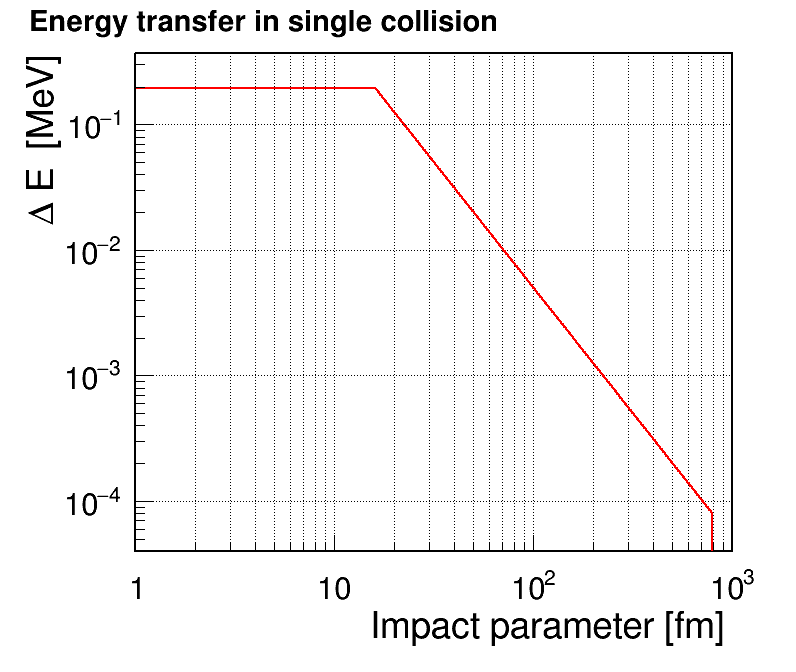

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdE
Info in <TCanvas::Print>: png file dE_approx.png has been created


In [15]:
# Plot energy loss as a function of impact parameter

def fundEc(x,par):
    return dEcut(par[0],par[1],x[0])

fdEc=TF1("fdEc",fundEc,1.,1000.,2)
fdEc.SetTitle("Energy transfer in single collision")
fdEc.SetParameter(0,Mp)   
fdEc.SetParameter(1,Vp) 
fdEc.SetNpx(1000)
fdEc.GetXaxis().SetTitle("Impact parameter [fm]")
fdEc.GetYaxis().SetTitle("#Delta E  [MeV]")

cdE=TCanvas('cdE')
cdE.SetLogx(1)
cdE.SetLogy(1)

fdEc.Draw()

cdE.Update()

fname='dE_approx.png'
cdE.Print(fname)
Image(filename=fname)

### Part V
### Average ionisation loss

In [16]:
# Combination of constants
K = 0.307075     # MeV*cm^2/mol

# Simplified model (semi-classical approach)   

def dEdx_simp(p,M,z=1):
    betagamma = p/M
    beta = betagamma/sqrt(1+betagamma*betagamma)
    val = K*rho*Z2A*z*z/beta/beta*log(2*me*betagamma*betagamma/I)
    return val

# Full Bethe formula (without density corrections)

def dEdx(p,M,z=1):
    betagamma = p/M
    beta = betagamma/sqrt(1+betagamma*betagamma)
    val = K*rho*Z2A*z*z/beta/beta*(0.5*log(2*me*betagamma*betagamma*Wmax(p,M,me)/I/I)-beta*beta)
    return val

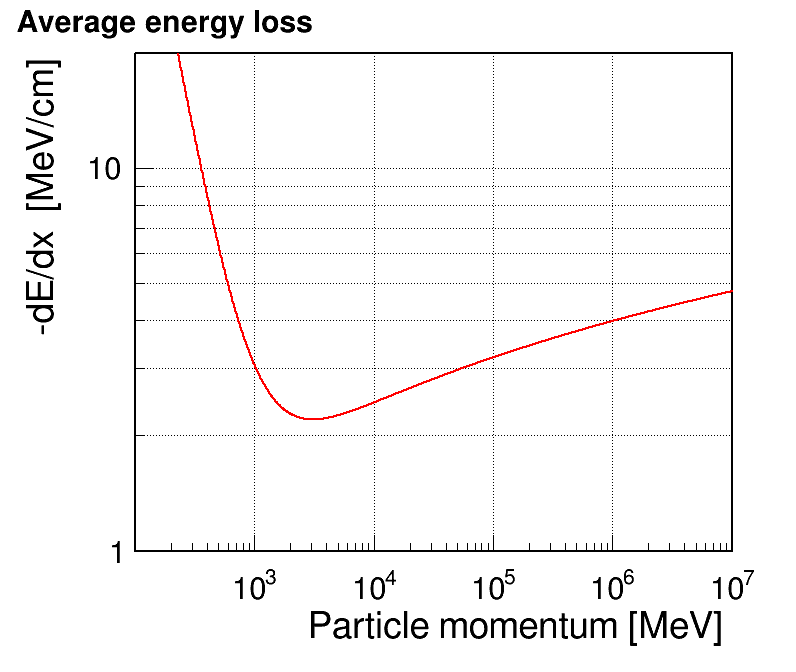

Info in <TCanvas::Print>: png file dEdxsimp.png has been created


In [17]:
def fundEdxsimp(x,par):
    return dEdx_simp(x[0],par[0],par[1])

fdEdxsimp=TF1("fdEdxsimp",fundEdxsimp,100.,10000000.,2)
fdEdxsimp.SetTitle("Average energy loss")
fdEdxsimp.SetParameter(0,Mp)   
fdEdxsimp.SetParameter(1,1) 
fdEdxsimp.SetNpx(1000)
fdEdxsimp.SetMinimum(1.)
fdEdxsimp.SetMaximum(20.)
fdEdxsimp.GetXaxis().SetTitle("Particle momentum [MeV]")
fdEdxsimp.GetYaxis().SetTitle("-dE/dx  [MeV/cm]")

cdEdxsimp=TCanvas('cdEdxsimp')
cdEdxsimp.SetLogx(1)
cdEdxsimp.SetLogy(1)

fdEdxsimp.Draw()

cdEdxsimp.Update()
cdEdxsimp.Print('dEdxsimp.png')

Image(filename='dEdxsimp.png')

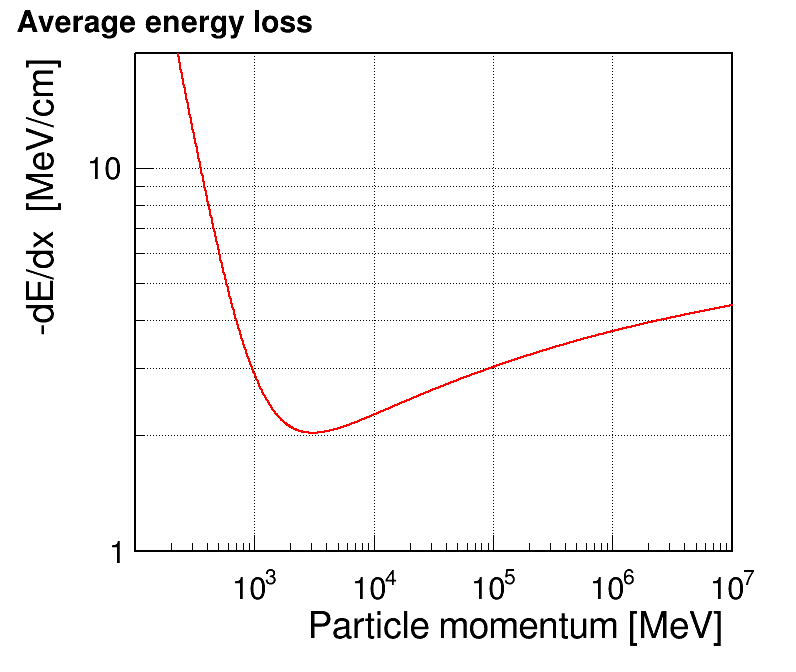

Info in <TCanvas::Print>: png file dEdx.png has been created


In [18]:
def fundEdx(x,par):
    return dEdx(x[0],par[0],par[1])

fdEdx=TF1("fdEdx",fundEdx,100.,10000000.,2)
fdEdx.SetTitle("Average energy loss")
fdEdx.SetParameter(0,Mp)   
fdEdx.SetParameter(1,1) 
fdEdx.SetNpx(1000)
fdEdx.SetMinimum(1.)
fdEdx.SetMaximum(20.)
fdEdx.GetXaxis().SetTitle("Particle momentum [MeV]")
fdEdx.GetYaxis().SetTitle("-dE/dx  [MeV/cm]")

cdEdx=TCanvas('cdEdx')
cdEdx.SetLogx(1)
cdEdx.SetLogy(1)

fdEdx.Draw()

cdEdx.Update()
cdEdx.Print('dEdx.png')

Image(filename='dEdx.png')

### Part VI
### Energy loss simulation

In [19]:
# Merium properties (silicon)
I = 0.000173     # Mean excitation energy [MeV] from PDG
# I = 0.000010     # Mean excitation energy [MeV]
# I = 0.0000036     # Mean excitation energy [MeV]
Z2A = 0.5     # mol/g
rho = 2.329 # g/cm^2

# Target thickness [cm]
D = 0.05  # 500µm

# New projectile velocity (previously set to 0.4 c)
Vp = 0.9 * c

In [20]:
# Find maximum impact parameter
    
bfunc = lambda b : dE_bohr(Mp,Vp,b) - I

bguess = 400.

bmax = fsolve(bfunc, bguess)[0]

print("Ionization threshold of ",1000000*I," eV corresponds to impact parameter b_max = ",bmax," fm")

Ionization threshold of  173.0  eV corresponds to impact parameter b_max =  240.65297171642837  fm


In [21]:
# Find number of electrons to consider in the cylinder of radius b_max

rfm = bmax* 1E-13  # convert fm to cm

Ne = np.pi * rfm * rfm * D * rho * Z2A * NA

print("Average number of electrons on particle trajectory: ",Ne)

Average number of electrons on particle trajectory:  63.79589538379154


In [22]:
# Generate events

Ngen = 10000

dE_tab = np.empty(Ngen,dtype=double)

for itry in range(Ngen):
    
    Nb = np.random.poisson(Ne)
  
    b_tab = np.random.uniform(size=Nb)
    b_tab = bmax*np.sqrt(b_tab)
    
    E_tab = dEcut(Mp,Vp,b_tab)
    
    dE_tab[itry]=np.sum(E_tab)

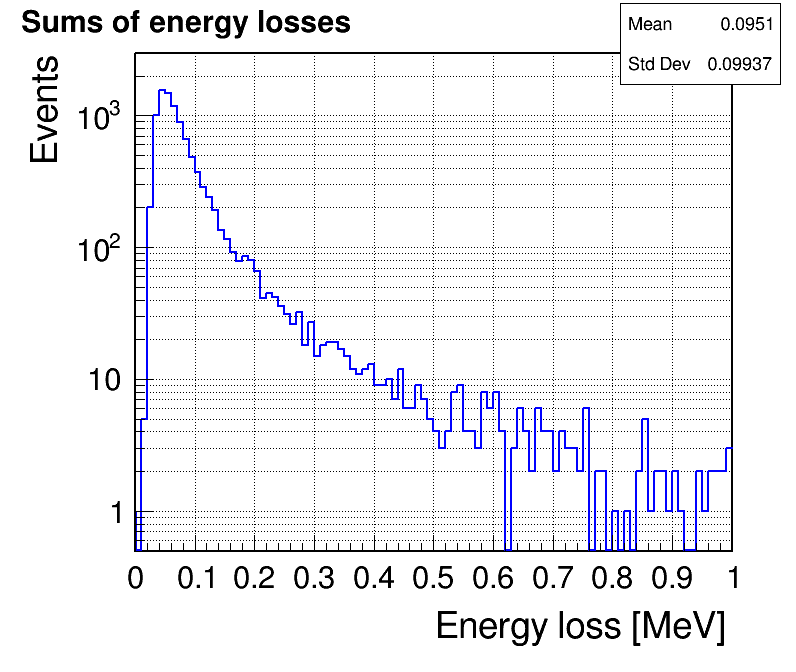

Info in <TCanvas::Print>: png file loss_dist.png has been created


In [23]:
Xmax = 1

hLoss = TH1D('hLoss','Sums of energy losses',100, 0., Xmax)
hLoss.SetStats(1)
hLoss.GetXaxis().SetTitle("Energy loss [MeV]")
hLoss.GetYaxis().SetTitle("Events")

for i in  range(Ngen):
    hLoss.Fill(dE_tab[i])

cLoss = TCanvas('cLoss')
cLoss.SetLogy(1)

hLoss.DrawCopy()

cLoss.Update()

fname='loss_dist.png'
cLoss.Print(fname)
Image(filename=fname)

### Part VII
### Fit of Landau distribution

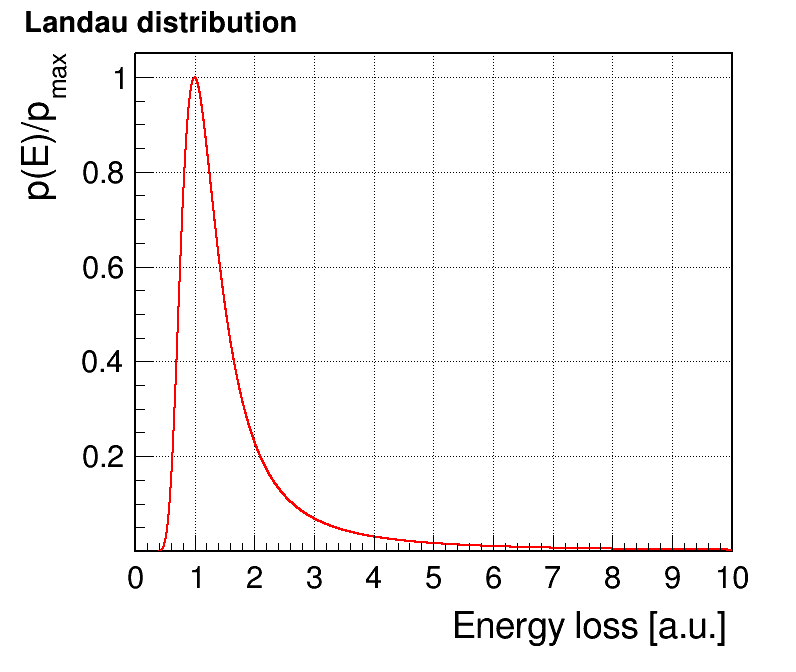

Info in <TCanvas::Print>: png file landau_fun.png has been created


In [24]:
# My interface to the Landau distribution from ROOT

def myLan(x, par):
    return par[0]*TMath.Landau(x[0],par[1],par[2])


# Define root function
# Parameters chosen to get "standard" shape: maximum at 1.0 with height of 1.0

flan=TF1("flan",myLan,0.,10.,3)
flan.SetParameter(0,5.5353933)
flan.SetParameter(1,1.04456)
flan.SetParameter(2,0.2)
flan.SetTitle("Landau distribution")

# Display function

cLan=TCanvas('cLan')
cLan.SetLogy(0)   # Change that !

flan.SetNpx(10000)
flan.SetMinimum(1E-3)
flan.GetXaxis().SetTitle("Energy loss [a.u.]")
flan.GetYaxis().SetTitle("p(E)/p_{max}")
flan.Draw()

cLan.Update()

fname='landau_fun.png'
cLan.Print(fname)
Image(filename=fname)

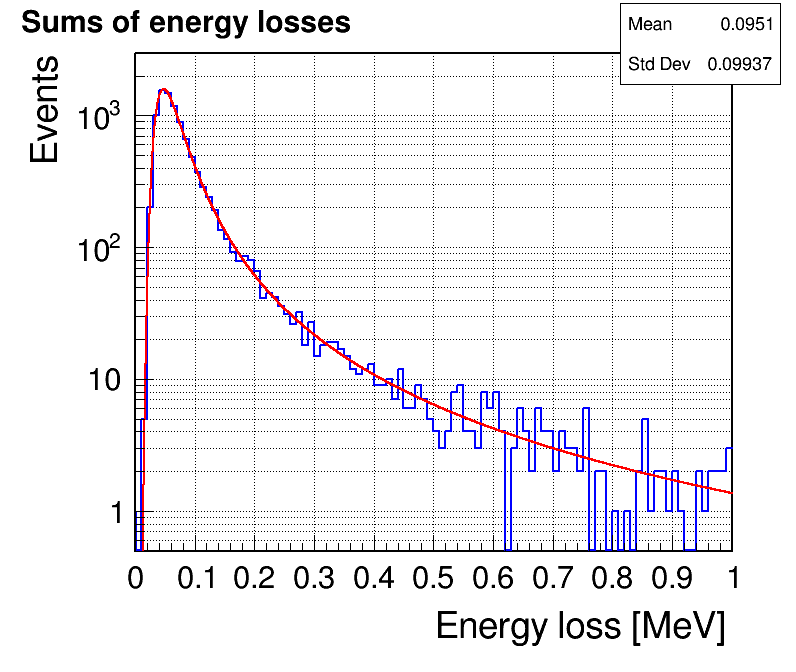

 FCN=56.0993 FROM MIGRAD    STATUS=CONVERGED     101 CALLS         102 TOTAL
                     EDM=1.69078e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.76956e+03   1.34246e+02   6.07622e-02   5.61077e-07
   2  p1           5.05814e-02   2.50241e-04   9.80067e-08   1.24225e-01
   3  p2           1.13633e-02   1.32385e-04   5.92149e-08   6.87792e-01


Info in <TCanvas::Print>: png file landau_fit.png has been created


In [25]:
# Fit Landau distribution to simulation results

flan.SetParameter(0,5000.)
flan.SetParameter(1,0.05)
flan.SetParameter(2,0.02)

cLan2=TCanvas('cLan2')
cLan2.SetLogy(1)

hLoss.Fit(flan)

cLan2.Update()

fname='landau_fit.png'
cLan2.Print(fname)
Image(filename=fname)


### Part VIII

### Generating random numbers from Landau distribution


In [26]:
# My interface to the integrated Landau distribution from ROOT
# (taking into account shift and scaling defined above)

def myLanI(x):
    return TMath.LandauI(5.0*(x-1.04456))

# Procedure for generation random number from Landau distribution

# gRandom.SetSeed(2018)

prec=0.001

def LanRnd():
    oldval=0.   
    oldx=0.
    step=1.
    val = gRandom.Uniform(1.)
#    print('Target val: ',val)
    
    while step>prec:
        newx=oldx+step
        newval=myLanI(newx)
#        print('Step = ',step,'  x = ',newx,' val = ',newval)

        if newval < val:
            oldx=newx
            oldval=newval
            step=2.0*step
        else:
            step=0.5*step
     
#    print('Found value of x = ',oldx,' corresponding to val = ',myLanI(oldx))
    return oldx


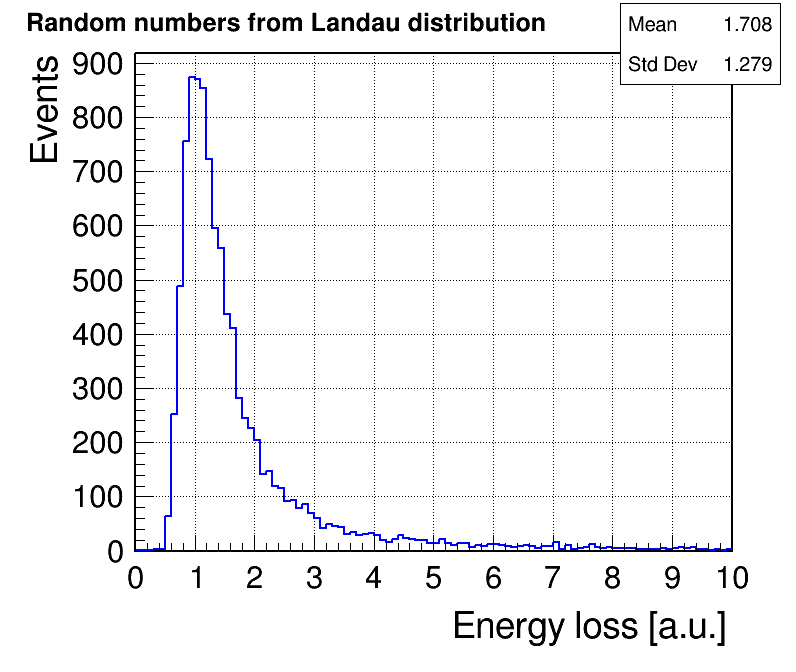

Info in <TCanvas::Print>: png file landau_gen.png has been created


In [27]:
# Define histogram and fill it with generated numbers

ngen = 10000

data = []
data.clear()

hLan = TH1D('hLan','Random numbers from Landau distribution',100, 0., 10.)
hLan.SetStats(1)
hLan.GetXaxis().SetTitle("Energy loss [a.u.]")
hLan.GetYaxis().SetTitle("Events")

for i in  range(ngen):
    lx=LanRnd()
    data.append(lx)
    hLan.Fill(lx)

cLan3 = TCanvas('cLan3')

hLan.DrawCopy()

cLan3.Update()
fname='landau_gen.png'
cLan3.Print(fname)

Image(filename=fname)

In [28]:
# Check mean and rms of generated data from histogram (!)

print(ngen,'random data generated from Landau PDF')
print('Average value from data histogram: ',hLan.GetMean())
print('RMS value from data histogram:     ',hLan.GetRMS())

print('')
print('Relative histogram width:     ',hLan.GetRMS()/hLan.GetMean())


10000 random data generated from Landau PDF
Average value from data histogram:  1.707672936659653
RMS value from data histogram:      1.2788273473926004

Relative histogram width:      0.7488713558312229


In [29]:
# Check mean and RMS of generated data

print('Maximum generated value:     ',np.nanmax(data))
print('Average value from all data: ',np.mean(data))
print('RMS value from all data:     ',np.std(data))


Maximum generated value:      9609.931640625
Average value from all data:  4.8056830078125
RMS value from all data:      125.08399758919697



### Part IX

### Undertanding properties of the Landau distribution


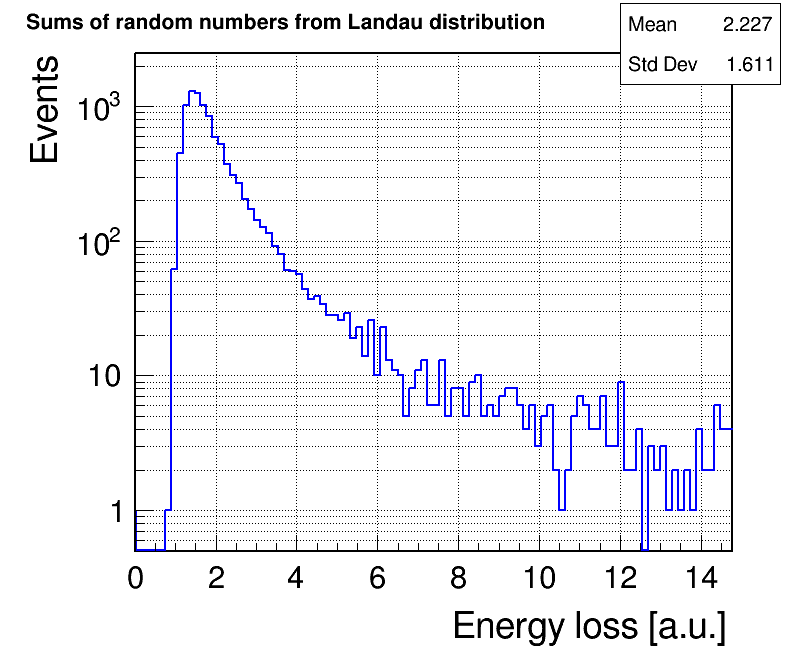

Info in <TCanvas::Print>: png file landau_gen_9.png has been created


In [30]:
# Define histogram and filling with sums of Nsum numbers generated from Landau distribution

# nsum = 1 reproduces results from Part VIII (single random number)
# Change to higher value (eg. 9, 25, 100) for sum of nsum Landau distributed numbers

nsum = 9
ngen = 10000

sums = []
sums.clear()

# To get similar coverage for different nsum

xmax = 10.*(1+log(1.0*nsum)/log(100.))

hLan2 = TH1D('hLan2','Sums of random numbers from Landau distribution',100, 0., xmax)
hLan2.SetStats(1)
hLan2.GetXaxis().SetTitle("Energy loss [a.u.]")
hLan2.GetYaxis().SetTitle("Events")

for i in  range(ngen):
    lx=0
    for j in range(nsum):
        lx=lx+LanRnd()/nsum   # normalize to one generation
    sums.append(lx)
    hLan2.Fill(lx)

cLan4 = TCanvas('cLan4')
cLan4.SetLogy(1)

hLan2.DrawCopy()

cLan4.Update()
fname='landau_gen_'+str(nsum)+'.png'
cLan4.Print(fname)
Image(filename=fname)

### Part X Homework

###  Brag peak

Consider beam of protons with kinetic energy $E_k$ = 300 MeV entering the volume ﬁlled with liquid water.
Calculate (and plot) the ionization energy loss distribution along the proton path, as a function of the 
propagation distance in water.

Compare the expected proton range in water for $E_k$ = 100 MeV, 200 MeV, 300 MeV and 400 MeV.
What is the energy range useful for medical therapy?

Hint: use numerical integration of the average ionization loss density (function dEdx defined above).


Incident proton energy:    50  MeV
         proton momentum:  310.3662483260705  MeV
   expected proton range:  2.259060828732171  cm
 
Incident proton energy:    100  MeV
         proton momentum:  444.5834187191423  MeV
   expected proton range:  7.793854625017008  cm
 
Incident proton energy:    150  MeV
         proton momentum:  551.3452859143717  MeV
   expected proton range:  15.913012675381548  cm
 
Incident proton energy:    200  MeV
         proton momentum:  644.4445921877227  MeV
   expected proton range:  26.172845699057728  cm
 
Incident proton energy:    250  MeV
         proton momentum:  729.1337603622536  MeV
   expected proton range:  38.24016812517284  cm
 
Incident proton energy:    300  MeV
         proton momentum:  808.0614138789207  MeV
   expected proton range:  51.8480371977967  cm
 
Incident proton energy:    350  MeV
         proton momentum:  882.7742954458972  MeV
   expected proton range:  66.78110784551714  cm
 
Incident proton energy:    400  MeV
     

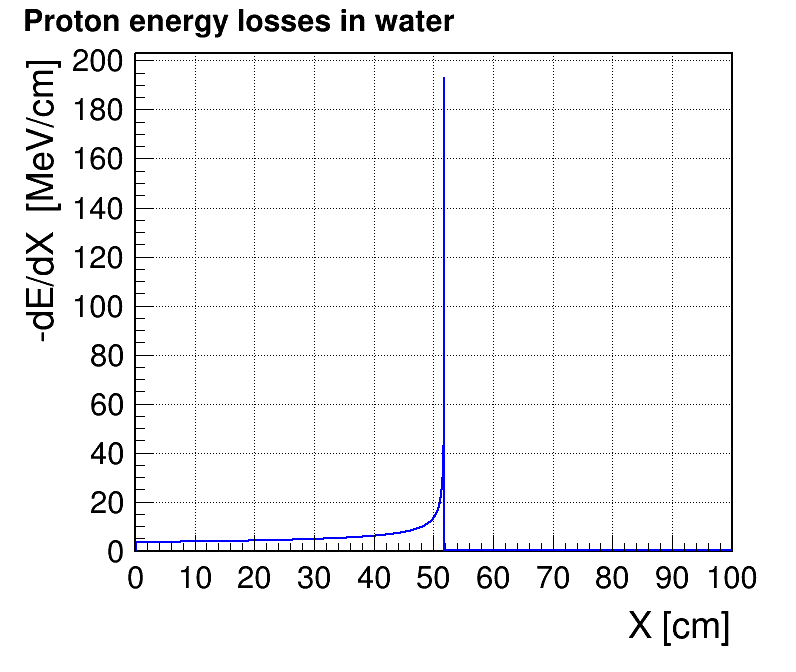

Info in <TCanvas::Print>: png file Bragg_peak.png has been created


In [31]:
# Medium properties (water)
I = 0.0000797      # Mean excitation energy [MeV]
Z2A = 0.55509      # mol/g
rho = 1.0          # g/cm^3

# Incident proton kinetic energy [MeV]

Ek_tab = np.array([ 50, 100 , 150, 200 , 250, 300, 350, 400, 450 ],dtype=double)

Ehist = 300

# Depth histogram (depth in cm)

Nbin = 10000  
Xmax = 100.
dX = Xmax/Nbin

gStyle.SetOptStat(0)
csh = TCanvas('csh')

Ekhist = TH1D("Ekhist","Proton energy losses in water",Nbin, 0, Xmax)
Ekhist.GetXaxis().SetTitle("X [cm]")
Ekhist.GetYaxis().SetTitle("-dE/dX  [MeV/cm]")

hopt = 'hist'

R_tab = np.empty(Ek_tab.size,dtype=double)
ir = 0

for Ek_0 in Ek_tab:
    print('Incident proton energy:   ',Ek_0,' MeV')
    
    Ek = Ek_0
    Xp = dX/2
    Xrange = Xp
    
    Etot = Ek_0 + Mp
    pp0 = sqrt(Etot*Etot - Mp*Mp)
    
    print('         proton momentum: ',pp0,' MeV')
 
    for istep in range(Nbin):
        
        # Calculate proton momentum for current kinetic energy
        
        Etot = Ek + Mp
        ppp = sqrt(Etot*Etot - Mp*Mp)
        
        # Expected losses for current momentum
        
        dEp = dEdx(ppp,Mp,1)

        # Fill histogram for one initial energy only (Ehist)
        
        if Ek_0 == Ehist: Ekhist.Fill(Xp,dEp)
        
        # Decrease energy and go to next step
        
        Ek = Ek - dX * dEp
        Xp = Xp + dX
        
        # Correct if expected loss higher than the energy
        
        if Ek < 0 :
            Xp = Xp + Ek/dEp
            Ek = 0
        
        # Set range to the center of the current bin/step
        
        Xrange = Xp - dX/2
        
        # Finish calculations is no energy left
        
        if Ek == 0 :
            break

    print('   expected proton range: ',Xrange,' cm')
    print(' ')
    
    R_tab[ir] = Xrange
    ir=ir+1    

Ekhist.DrawClone(hopt)
csh.Update()
    
    
fname = 'Bragg_peak.png'
csh.Print(fname)

Image(filename=fname) 

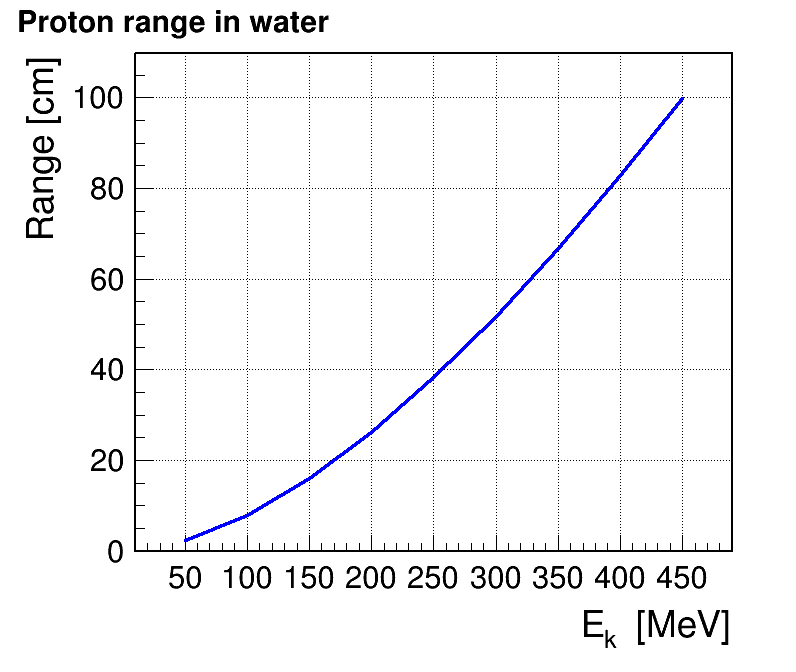

Info in <TCanvas::Print>: png file proton_range.png has been created


In [32]:
crg = TCanvas('crg')

grr = TGraph(Ek_tab.size,array('d',Ek_tab),array('d',R_tab))
grr.SetLineColor(4)
grr.SetLineWidth(3)
grr.SetMinimum(0.)
grr.GetXaxis().SetTitle("E_{k}  [MeV]")
grr.GetYaxis().SetTitle("Range [cm]")

grr.SetTitle("Proton range in water")
    
grr.Draw("AWL")
             
crg.Update()
    
    
fname = 'proton_range.png'
crg.Print(fname)

Image(filename=fname) 

### Energy range for radiotherapy

Assuming human body has a diameter of 50 cm, proton range of 25 cm is required to reach each point inside the body. This indicates that the minimum useful energy is about 200 MeV. However, to be able to access each point from multiple directions, slightly higher energies, up to about 250 MeV should be available.
